In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Infarc_Area": [
        0.119, 0.19, 0.395, 0.469, 0.13, 0.311, 0.418, 0.48, 0.687, 0.847,
        0.062, 0.122, 0.033, 0.102, 0.206, 0.249, 0.22, 0.299, 0.35, 0.35,
        0.588, 0.379, 0.149, 0.316, 0.39, 0.429, 0.477, 0.439, 0.446, 0.538,
        0.625, 0.974
    ],
    "Region_at_Risk": [
        0.34, 0.64, 0.76, 0.83, 0.73, 0.82, 0.95, 1.06, 1.2, 1.47,
        0.44, 0.77, 0.9, 1.07, 1.01, 1.03, 1.16, 1.21, 1.2, 1.22,
        0.99, 0.77, 1.05, 1.06, 1.02, 0.99, 0.97, 1.12, 1.23, 1.19, 
        1.22, 1.4
    ],
    "Early_Cooling": [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0
    ],
    "Late_Cooling": [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1
    ]
}

df = pd.DataFrame(data)

df.to_csv('infarcted_area_data.csv')


Multiple Linear Regression Coefficients:
Intercept: -0.13101262805798486
Coefficient for Region_at_Risk (X1): 0.5689226515584886
Coefficient for Early_Cooling (X2): -0.20421825146554307
Coefficient for Late_Cooling (X3): 0.01039050761545357

MSE: 0.01762899767035938
RMSE: 0.13277423571747413


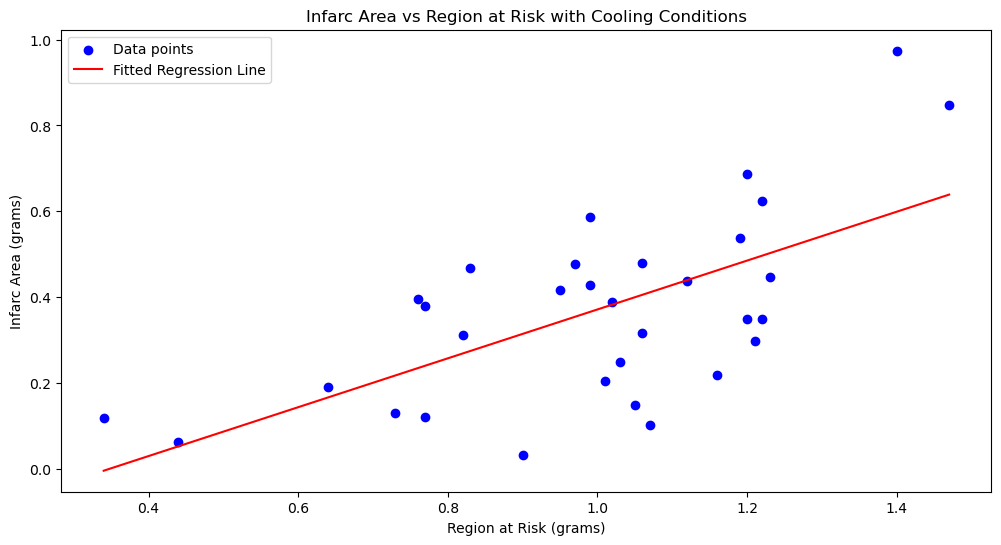

In [22]:
df = pd.read_csv('infarcted_area_data.csv')

y = df['Infarc_Area'].values
x1 = df['Region_at_Risk'].values  
x2 = df['Early_Cooling'].values  
x3 = df['Late_Cooling'].values    

X = np.c_[np.ones(len(x1)), x1, x2, x3] 

A = np.dot(X.T,X)
b = np.dot(X.T,y)
coeffs = np.dot(np.linalg.inv(A),b)

intercept, coef_area, coef_early, coef_late = coeffs

y_pred = np.dot(X,coeffs)

mse = np.mean((y - y_pred) ** 2)
rmse = np.sqrt(mse)

print("Multiple Linear Regression Coefficients:")
print(f"Intercept: {intercept}")
print(f"Coefficient for Region_at_Risk (X1): {coef_area}")
print(f"Coefficient for Early_Cooling (X2): {coef_early}")
print(f"Coefficient for Late_Cooling (X3): {coef_late}")

print(f"\nMSE: {mse}")
print(f"RMSE: {rmse}")

plt.figure(figsize=(12, 6))

plt.scatter(x1, y, c='blue', label='Data points')

x_fit = np.linspace(min(x1), max(x1), 100)
X_fit = np.c_[np.ones(x_fit.shape[0]), x_fit, np.mean(x2) * np.ones(x_fit.shape[0]), np.mean(x3) * np.ones(x_fit.shape[0])]
y_fit = X_fit @ theta

plt.plot(x_fit, y_fit, c='red', label='Fitted Regression Line')

plt.xlabel('Region at Risk (grams)')
plt.ylabel('Infarc Area (grams)')
plt.title('Infarc Area vs Region at Risk with Cooling Conditions')
plt.legend()
plt.show()


In [18]:
def calculate_coefficients(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [19]:
coefficients = calculate_coefficients(X, y)

print("Coefficients:")
print(f"Intercept (β0): {coefficients[0]:.4f}")
print(f"β1 (Region at Risk): {coefficients[1]:.4f}")
print(f"β2 (Early Cooling): {coefficients[2]:.4f}")
print(f"β3 (Late Cooling): {coefficients[3]:.4f}")

Coefficients:
Intercept (β0): -0.1310
β1 (Region at Risk): 0.5689
β2 (Early Cooling): -0.2042
β3 (Late Cooling): 0.0104


In [20]:
y_pred = X @ coefficients

mse = np.mean((y - y_pred) ** 2)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

Mean Squared Error (MSE): 0.0176
Root Mean Squared Error (RMSE): 0.1328


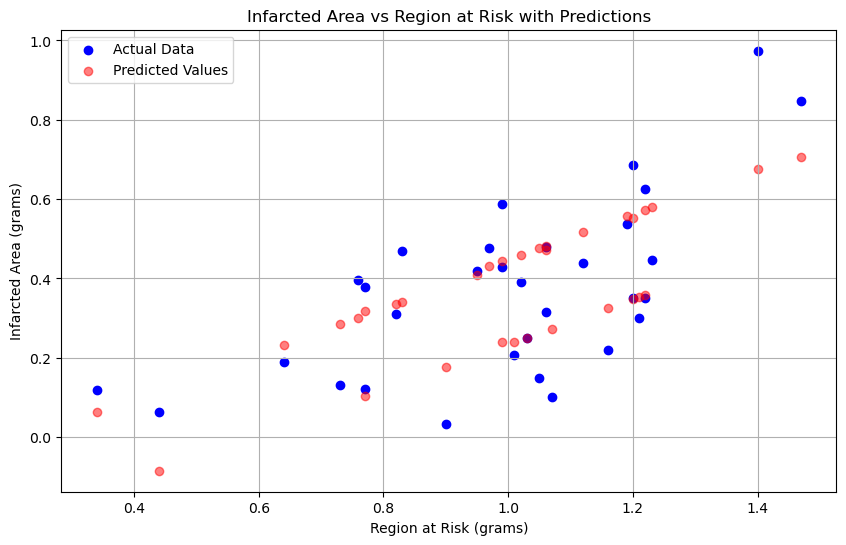

In [21]:
plt.figure(figsize=(10, 6))

plt.scatter(data['Region_at_Risk'], y, color='blue', label='Actual Data')

plt.scatter(data['Region_at_Risk'], y_pred, color='red', label='Predicted Values', alpha=0.5)

plt.title('Infarcted Area vs Region at Risk with Predictions')
plt.xlabel('Region at Risk (grams)')
plt.ylabel('Infarcted Area (grams)')
plt.legend()
plt.grid()
plt.show()